# 🧠 Redes Multicapa + PCA para Clasificación de Dígitos

In [12]:
# Importar librerías necesarias
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Cargar el dataset
digits = load_digits()
X, y = digits.data, digits.target

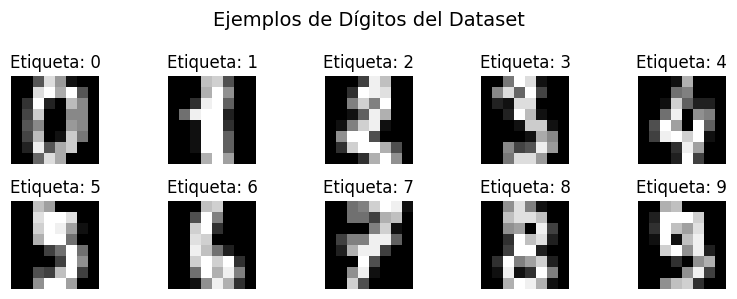

In [3]:
# Digitos dataset contiene imágenes de dígitos escritos a mano
plt.figure(figsize=(8, 3))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Etiqueta: {digits.target[i]}")
    plt.axis('off')
plt.suptitle("Ejemplos de Dígitos del Dataset", fontsize=14)
plt.tight_layout()
plt.show()

In [4]:
# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Aplicar PCA para reducción de dimensionalidad
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

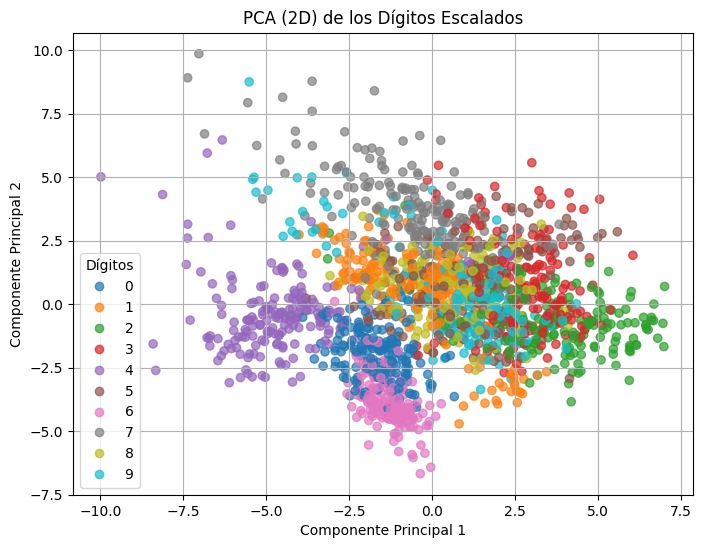

In [6]:
# Visualizar los datos reducidos
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Dígitos")
plt.title("PCA (2D) de los Dígitos Escalados")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()

In [7]:
# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
# Crear y entrenar el modelo de red neuronal
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu',max_iter=300, random_state=42, verbose=True)
mlp.fit(X_train, y_train)


Iteration 1, loss = 2.39014446
Iteration 2, loss = 2.04694924
Iteration 3, loss = 1.76446049
Iteration 4, loss = 1.49766926
Iteration 5, loss = 1.24852846
Iteration 6, loss = 1.02610439
Iteration 7, loss = 0.83784432
Iteration 8, loss = 0.68490346
Iteration 9, loss = 0.56555302
Iteration 10, loss = 0.47269019
Iteration 11, loss = 0.39978805
Iteration 12, loss = 0.34307285
Iteration 13, loss = 0.29883049
Iteration 14, loss = 0.26216946
Iteration 15, loss = 0.23334984
Iteration 16, loss = 0.20901164
Iteration 17, loss = 0.18857971
Iteration 18, loss = 0.17128499
Iteration 19, loss = 0.15629451
Iteration 20, loss = 0.14316985
Iteration 21, loss = 0.13181079
Iteration 22, loss = 0.12115363
Iteration 23, loss = 0.11274056
Iteration 24, loss = 0.10456942
Iteration 25, loss = 0.09706297
Iteration 26, loss = 0.09119109
Iteration 27, loss = 0.08441270
Iteration 28, loss = 0.07879478
Iteration 29, loss = 0.07363559
Iteration 30, loss = 0.06917809
Iteration 31, loss = 0.06497518
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42,
              verbose=True)

In [9]:
# Evaluacion del modelo
y_pred = mlp.predict(X_test)
print("\n📋 Reporte de Clasificación:")
print(classification_report(y_test, y_pred))
print("✅ Accuracy:", accuracy_score(y_test, y_pred))


📋 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       0.94      0.97      0.96        34
           4       0.98      1.00      0.99        46
           5       0.96      0.96      0.96        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      1.00      0.98        30
           9       0.97      0.93      0.95        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

✅ Accuracy: 0.9777777777777777


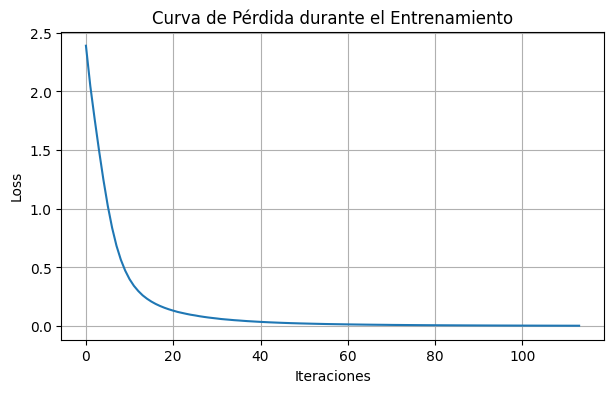

In [10]:
# Curva de perdida
if hasattr(mlp, 'loss_curve_'):
    plt.figure(figsize=(7, 4))
    plt.plot(mlp.loss_curve_)
    plt.title("Curva de Pérdida durante el Entrenamiento")
    plt.xlabel("Iteraciones")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.show()

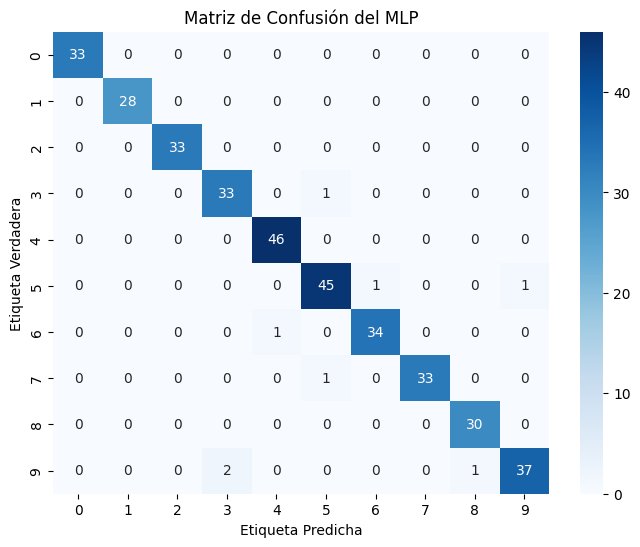

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión del MLP")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Verdadera")
plt.show()

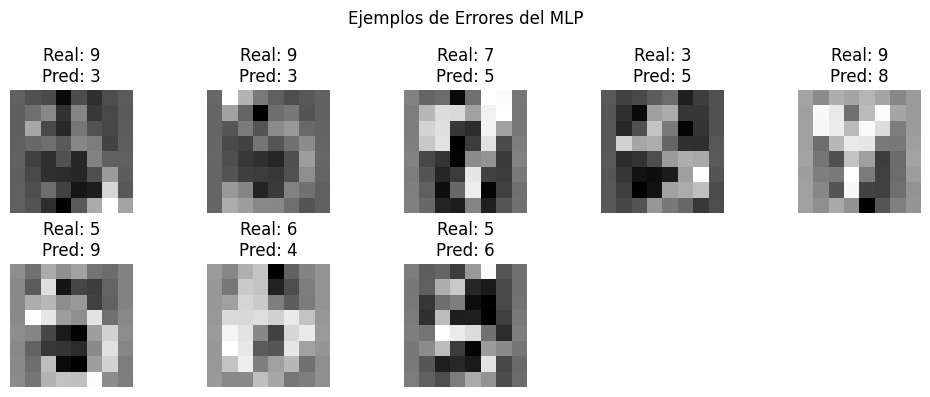

In [13]:
wrong = np.where(y_pred != y_test)[0]
plt.figure(figsize=(10, 4))
for i, idx in enumerate(wrong[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx].reshape(8, 8), cmap='gray')
    plt.title(f"Real: {y_test[idx]}\nPred: {y_pred[idx]}")
    plt.axis('off')
plt.suptitle("Ejemplos de Errores del MLP")
plt.tight_layout()
plt.show()